In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
import glob
import re
import zipfile

In [3]:

    zf = zipfile.ZipFile('C:\\Users\\sathiamoorthi\\Downloads\\archive.zip')
    dfs = [pd.read_csv(zf.open(f)) for f in zf.namelist()]
    df = pd.concat(dfs,ignore_index = True)


In [4]:
df

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $)
0,tt9114286,Black Panther: Wakanda Forever,2022,PG-13,161 min,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,/name/nm3363032/,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204835.0,NaN
1,tt1630029,Avatar: The Way of Water,2022,PG-13,192 min,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,/name/nm0000116/,"Sam Worthington, \nZoe Saldana, \nSigourney We...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",295119.0,NaN
2,tt5884796,Plane,2023,R,107 min,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,/name/nm0724938/,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ...","/name/nm0124930/,/name/nm1591496/,/name/nm0001...",26220.0,NaN
3,tt6710474,Everything Everywhere All at Once,2022,R,139 min,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert",/name/nm3453283/,"Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...","/name/nm3215397/,/name/nm0000706/,/name/nm3513...",327858.0,NaN
4,tt5433140,Fast X,2023,NaN,NaN,"Action, Crime, Mystery",NaN,Dom Toretto and his family are targeted by the...,Louis Leterrier,/name/nm0504642/,"Vin Diesel, \nJordana Brewster, \nTyrese Gibso...","/name/nm0004874/,/name/nm0108287/,/name/nm0879...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298970,tt26698087,Janissary,NaN,NaN,NaN,"Drama, History, War",NaN,A young man is captured and brainwashed to fig...,NaN,NaN,NaN,NaN,NaN,NaN
298971,tt26690183,World War 1 project,NaN,NaN,NaN,War,NaN,Add a Plot,"Dominic Higgins, \nIan Higgins",/name/nm3836407/,NaN,/name/nm3838864/,NaN,NaN
298972,tt26695367,74,NaN,NaN,NaN,War,NaN,"74 centres on the lives of four women, and the...",NaN,NaN,NaN,NaN,NaN,NaN
298973,tt26698193,Pandora Palace,2019,NaN,NaN,"Action, Adventure, Drama",NaN,After Rajmahone Dictator Alexander Pandora lau...,Evan Kascinde,/name/nm11925490/,"Muhammad Al Abasiri, \nBrai Andujar, \nDon Bla...","/name/nm11799756/,/name/nm8613643/,/name/nm145...",NaN,NaN


In [5]:
df.dtypes

movie_id        object
movie_name      object
year            object
certificate     object
runtime         object
genre           object
rating         float64
description     object
director        object
director_id     object
star            object
star_id         object
votes          float64
gross(in $)    float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298975 entries, 0 to 298974
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movie_id     298975 non-null  object 
 1   movie_name   298975 non-null  object 
 2   year         252538 non-null  object 
 3   certificate  83965 non-null   object 
 4   runtime      206995 non-null  object 
 5   genre        298975 non-null  object 
 6   rating       184442 non-null  float64
 7   description  298975 non-null  object 
 8   director     275481 non-null  object 
 9   director_id  275481 non-null  object 
 10  star         249234 non-null  object 
 11  star_id      254795 non-null  object 
 12  votes        184446 non-null  float64
 13  gross(in $)  19509 non-null   float64
dtypes: float64(3), object(11)
memory usage: 31.9+ MB


In [7]:
df.nunique()

movie_id       198629
movie_name     174858
year              220
certificate        43
runtime           357
genre            1671
rating             91
description    153427
director        89035
director_id     83353
star           159004
star_id        163142
votes           14741
gross(in $)      8926
dtype: int64

In [8]:
df1 = df.drop(['certificate','director_id','star_id','votes','gross(in $)'],axis = 1)

In [9]:
df1

,movie_id,movie_name,year,runtime,genre,rating,description,director,star
0,tt9114286,Black Panther: Wakanda Forever,2022,161 min,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri..."
1,tt1630029,Avatar: The Way of Water,2022,192 min,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,"Sam Worthington, \nZoe Saldana, \nSigourney We..."
2,tt5884796,Plane,2023,107 min,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ..."
3,tt6710474,Everything Everywhere All at Once,2022,139 min,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert","Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu..."
4,tt5433140,Fast X,2023,NaN,"Action, Crime, Mystery",NaN,Dom Toretto and his family are targeted by the...,Louis Leterrier,"Vin Diesel, \nJordana Brewster, \nTyrese Gibso..."
...,...,...,...,...,...,...,...,...,...
298970,tt26698087,Janissary,NaN,NaN,"Drama, History, War",NaN,A young man is captured and brainwashed to fig...,NaN,NaN
298971,tt26690183,World War 1 project,NaN,NaN,War,NaN,Add a Plot,"Dominic Higgins, \nIan Higgins",NaN
298972,tt26695367,74,NaN,NaN,War,NaN,"74 centres on the lives of four women, and the...",NaN,NaN
298973,tt26698193,Pandora Palace,2019,NaN,"Action, Adventure, Drama",NaN,After Rajmahone Dictator Alexander Pandora lau...,Evan Kascinde,"Muhammad Al Abasiri, \nBrai Andujar, \nDon Bla..."


In [10]:
df1["movie_name"].nunique()

174858

In [11]:
df1 = df1.drop_duplicates(subset = ['movie_name'])

In [12]:
df1

,movie_id,movie_name,year,runtime,genre,rating,description,director,star
0,tt9114286,Black Panther: Wakanda Forever,2022,161 min,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri..."
1,tt1630029,Avatar: The Way of Water,2022,192 min,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,"Sam Worthington, \nZoe Saldana, \nSigourney We..."
2,tt5884796,Plane,2023,107 min,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ..."
3,tt6710474,Everything Everywhere All at Once,2022,139 min,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert","Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu..."
4,tt5433140,Fast X,2023,NaN,"Action, Crime, Mystery",NaN,Dom Toretto and his family are targeted by the...,Louis Leterrier,"Vin Diesel, \nJordana Brewster, \nTyrese Gibso..."
...,...,...,...,...,...,...,...,...,...
298966,tt0009655,Stolen Orders,1918,80 min,"War, Drama",4.6,A renegade American and his innocent daughter ...,"George Kelson, \nHarley Knoles","Montagu Love, \nKitty Gordon, \nJune Elvidge, ..."
298969,tt26684378,Dalilah,NaN,NaN,War,NaN,Add a Plot,Lee Beebe,"Paul Forrest Quinn, \nLinus Ignatius, \nErich ..."
298971,tt26690183,World War 1 project,NaN,NaN,War,NaN,Add a Plot,"Dominic Higgins, \nIan Higgins",NaN
298972,tt26695367,74,NaN,NaN,War,NaN,"74 centres on the lives of four women, and the...",NaN,NaN


In [13]:
df1.describe()

,rating
count,99487.000000
mean,5.794056
std,1.364087
min,1.000000
25%,5.000000
50%,5.900000
75%,6.700000
max,10.000000


In [14]:
df2 = df1.dropna(subset=['movie_name','year','director','star'])

In [15]:
df2

,movie_id,movie_name,year,runtime,genre,rating,description,director,star
0,tt9114286,Black Panther: Wakanda Forever,2022,161 min,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri..."
1,tt1630029,Avatar: The Way of Water,2022,192 min,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,"Sam Worthington, \nZoe Saldana, \nSigourney We..."
2,tt5884796,Plane,2023,107 min,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ..."
3,tt6710474,Everything Everywhere All at Once,2022,139 min,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert","Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu..."
4,tt5433140,Fast X,2023,NaN,"Action, Crime, Mystery",NaN,Dom Toretto and his family are targeted by the...,Louis Leterrier,"Vin Diesel, \nJordana Brewster, \nTyrese Gibso..."
...,...,...,...,...,...,...,...,...,...
298963,tt0351402,Na dorogakh voyny,1959,NaN,War,5.7,Add a Plot,Lev Saakov,"Vsevolod Sanaev, \nAnatoliy Kuznetsov, \nYury ..."
298964,tt0257609,Together in Life and Death,1964,96 min,"Drama, Romance, War",4.1,"Inspired by Spyridon Peresiadis' play ""Esme, t...",Ilias Mahairas,"Manos Katrakis, \nMarlen Papoulia, \nAndreas B..."
298965,tt5033220,Opération Maillot,2015,NaN,War,NaN,Add a Plot,Okacha Touita,"Martin Pautard, \nMohamed Seghir Bendaoud, \nM..."
298966,tt0009655,Stolen Orders,1918,80 min,"War, Drama",4.6,A renegade American and his innocent daughter ...,"George Kelson, \nHarley Knoles","Montagu Love, \nKitty Gordon, \nJune Elvidge, ..."


In [16]:
values = {"rating" : df2['rating'].quantile(0.5)}
movie_clean = df2.fillna(value = values)

In [17]:
movie_clean

,movie_id,movie_name,year,runtime,genre,rating,description,director,star
0,tt9114286,Black Panther: Wakanda Forever,2022,161 min,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri..."
1,tt1630029,Avatar: The Way of Water,2022,192 min,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,"Sam Worthington, \nZoe Saldana, \nSigourney We..."
2,tt5884796,Plane,2023,107 min,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ..."
3,tt6710474,Everything Everywhere All at Once,2022,139 min,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert","Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu..."
4,tt5433140,Fast X,2023,NaN,"Action, Crime, Mystery",5.9,Dom Toretto and his family are targeted by the...,Louis Leterrier,"Vin Diesel, \nJordana Brewster, \nTyrese Gibso..."
...,...,...,...,...,...,...,...,...,...
298963,tt0351402,Na dorogakh voyny,1959,NaN,War,5.7,Add a Plot,Lev Saakov,"Vsevolod Sanaev, \nAnatoliy Kuznetsov, \nYury ..."
298964,tt0257609,Together in Life and Death,1964,96 min,"Drama, Romance, War",4.1,"Inspired by Spyridon Peresiadis' play ""Esme, t...",Ilias Mahairas,"Manos Katrakis, \nMarlen Papoulia, \nAndreas B..."
298965,tt5033220,Opération Maillot,2015,NaN,War,5.9,Add a Plot,Okacha Touita,"Martin Pautard, \nMohamed Seghir Bendaoud, \nM..."
298966,tt0009655,Stolen Orders,1918,80 min,"War, Drama",4.6,A renegade American and his innocent daughter ...,"George Kelson, \nHarley Knoles","Montagu Love, \nKitty Gordon, \nJune Elvidge, ..."


In [18]:
movie_clean['runtime'] = movie_clean['runtime'].str.replace(' min','')
movie_clean['runtime'] = movie_clean['runtime'].str.replace(',','')

In [19]:
movie_clean

,movie_id,movie_name,year,runtime,genre,rating,description,director,star
0,tt9114286,Black Panther: Wakanda Forever,2022,161,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri..."
1,tt1630029,Avatar: The Way of Water,2022,192,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,"Sam Worthington, \nZoe Saldana, \nSigourney We..."
2,tt5884796,Plane,2023,107,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ..."
3,tt6710474,Everything Everywhere All at Once,2022,139,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert","Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu..."
4,tt5433140,Fast X,2023,NaN,"Action, Crime, Mystery",5.9,Dom Toretto and his family are targeted by the...,Louis Leterrier,"Vin Diesel, \nJordana Brewster, \nTyrese Gibso..."
...,...,...,...,...,...,...,...,...,...
298963,tt0351402,Na dorogakh voyny,1959,NaN,War,5.7,Add a Plot,Lev Saakov,"Vsevolod Sanaev, \nAnatoliy Kuznetsov, \nYury ..."
298964,tt0257609,Together in Life and Death,1964,96,"Drama, Romance, War",4.1,"Inspired by Spyridon Peresiadis' play ""Esme, t...",Ilias Mahairas,"Manos Katrakis, \nMarlen Papoulia, \nAndreas B..."
298965,tt5033220,Opération Maillot,2015,NaN,War,5.9,Add a Plot,Okacha Touita,"Martin Pautard, \nMohamed Seghir Bendaoud, \nM..."
298966,tt0009655,Stolen Orders,1918,80,"War, Drama",4.6,A renegade American and his innocent daughter ...,"George Kelson, \nHarley Knoles","Montagu Love, \nKitty Gordon, \nJune Elvidge, ..."


In [20]:
values = {"runtime" : 0}
movie_clean = movie_clean.fillna(value = values)

In [21]:
movie_clean['runtime'] = movie_clean['runtime'].apply(np.int64)

In [22]:
movie_clean['runtime'] = movie_clean['runtime'].replace(0,movie_clean['runtime'].quantile(0.5))

In [23]:
movie_clean['runtime'] = movie_clean['runtime'].apply(np.int64)

In [24]:
movie_clean.dtypes

movie_id        object
movie_name      object
year            object
runtime          int64
genre           object
rating         float64
description     object
director        object
star            object
dtype: object

In [25]:
movie_clean

,movie_id,movie_name,year,runtime,genre,rating,description,director,star
0,tt9114286,Black Panther: Wakanda Forever,2022,161,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri..."
1,tt1630029,Avatar: The Way of Water,2022,192,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,"Sam Worthington, \nZoe Saldana, \nSigourney We..."
2,tt5884796,Plane,2023,107,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ..."
3,tt6710474,Everything Everywhere All at Once,2022,139,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert","Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu..."
4,tt5433140,Fast X,2023,88,"Action, Crime, Mystery",5.9,Dom Toretto and his family are targeted by the...,Louis Leterrier,"Vin Diesel, \nJordana Brewster, \nTyrese Gibso..."
...,...,...,...,...,...,...,...,...,...
298963,tt0351402,Na dorogakh voyny,1959,88,War,5.7,Add a Plot,Lev Saakov,"Vsevolod Sanaev, \nAnatoliy Kuznetsov, \nYury ..."
298964,tt0257609,Together in Life and Death,1964,96,"Drama, Romance, War",4.1,"Inspired by Spyridon Peresiadis' play ""Esme, t...",Ilias Mahairas,"Manos Katrakis, \nMarlen Papoulia, \nAndreas B..."
298965,tt5033220,Opération Maillot,2015,88,War,5.9,Add a Plot,Okacha Touita,"Martin Pautard, \nMohamed Seghir Bendaoud, \nM..."
298966,tt0009655,Stolen Orders,1918,80,"War, Drama",4.6,A renegade American and his innocent daughter ...,"George Kelson, \nHarley Knoles","Montagu Love, \nKitty Gordon, \nJune Elvidge, ..."


In [26]:
movie_clean.describe()

,runtime,rating
count,133545.000000,133545.000000
mean,93.886652,5.818249
std,33.354384,1.168630
min,1.000000,1.000000
25%,85.000000,5.300000
50%,88.000000,5.900000
75%,100.000000,6.400000
max,5538.000000,10.000000


In [27]:
movie_clean['director'] = movie_clean['director'].str.replace('\n','')

In [28]:
movie_clean['star'] = movie_clean['star'].str.replace('\n','')

In [29]:
movie_clean

,movie_id,movie_name,year,runtime,genre,rating,description,director,star
0,tt9114286,Black Panther: Wakanda Forever,2022,161,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,"Letitia Wright, Lupita Nyong'o, Danai Gurira, ..."
1,tt1630029,Avatar: The Way of Water,2022,192,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver..."
2,tt5884796,Plane,2023,107,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,"Gerard Butler, Mike Colter, Tony Goldwyn, Yoso..."
3,tt6710474,Everything Everywhere All at Once,2022,139,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, Daniel Scheinert","Michelle Yeoh, Stephanie Hsu, Jamie Lee Curtis..."
4,tt5433140,Fast X,2023,88,"Action, Crime, Mystery",5.9,Dom Toretto and his family are targeted by the...,Louis Leterrier,"Vin Diesel, Jordana Brewster, Tyrese Gibson, M..."
...,...,...,...,...,...,...,...,...,...
298963,tt0351402,Na dorogakh voyny,1959,88,War,5.7,Add a Plot,Lev Saakov,"Vsevolod Sanaev, Anatoliy Kuznetsov, Yury Solo..."
298964,tt0257609,Together in Life and Death,1964,96,"Drama, Romance, War",4.1,"Inspired by Spyridon Peresiadis' play ""Esme, t...",Ilias Mahairas,"Manos Katrakis, Marlen Papoulia, Andreas Barko..."
298965,tt5033220,Opération Maillot,2015,88,War,5.9,Add a Plot,Okacha Touita,"Martin Pautard, Mohamed Seghir Bendaoud, Matth..."
298966,tt0009655,Stolen Orders,1918,80,"War, Drama",4.6,A renegade American and his innocent daughter ...,"George Kelson, Harley Knoles","Montagu Love, Kitty Gordon, June Elvidge, Carl..."


In [35]:
movie_clean['star'] = movie_clean['star'].str.split(", ")

In [38]:
movie_clean['star'][0][0]

'Letitia Wright'

In [39]:
movie_clean['director'] = movie_clean['director'].str.split(", ")

In [44]:
movie_clean['director'][3][0]

'Dan Kwan'

In [45]:
movie_clean['genre'] = movie_clean['genre'].str.split(", ")

In [46]:
movie_clean

,movie_id,movie_name,year,runtime,genre,rating,description,director,star
0,tt9114286,Black Panther: Wakanda Forever,2022,161,"[Action, Adventure, Drama]",6.9,The people of Wakanda fight to protect their h...,[Ryan Coogler],"[Letitia Wright, Lupita Nyong'o, Danai Gurira,..."
1,tt1630029,Avatar: The Way of Water,2022,192,"[Action, Adventure, Fantasy]",7.8,Jake Sully lives with his newfound family form...,[James Cameron],"[Sam Worthington, Zoe Saldana, Sigourney Weave..."
2,tt5884796,Plane,2023,107,"[Action, Thriller]",6.5,A pilot finds himself caught in a war zone aft...,[Jean-François Richet],"[Gerard Butler, Mike Colter, Tony Goldwyn, Yos..."
3,tt6710474,Everything Everywhere All at Once,2022,139,"[Action, Adventure, Comedy]",8.0,A middle-aged Chinese immigrant is swept up in...,"[Dan Kwan, Daniel Scheinert]","[Michelle Yeoh, Stephanie Hsu, Jamie Lee Curti..."
4,tt5433140,Fast X,2023,88,"[Action, Crime, Mystery]",5.9,Dom Toretto and his family are targeted by the...,[Louis Leterrier],"[Vin Diesel, Jordana Brewster, Tyrese Gibson, ..."
...,...,...,...,...,...,...,...,...,...
298963,tt0351402,Na dorogakh voyny,1959,88,[War],5.7,Add a Plot,[Lev Saakov],"[Vsevolod Sanaev, Anatoliy Kuznetsov, Yury Sol..."
298964,tt0257609,Together in Life and Death,1964,96,"[Drama, Romance, War]",4.1,"Inspired by Spyridon Peresiadis' play ""Esme, t...",[Ilias Mahairas],"[Manos Katrakis, Marlen Papoulia, Andreas Bark..."
298965,tt5033220,Opération Maillot,2015,88,[War],5.9,Add a Plot,[Okacha Touita],"[Martin Pautard, Mohamed Seghir Bendaoud, Matt..."
298966,tt0009655,Stolen Orders,1918,80,"[War, Drama]",4.6,A renegade American and his innocent daughter ...,"[George Kelson, Harley Knoles]","[Montagu Love, Kitty Gordon, June Elvidge, Car..."


In [49]:
rating = pd.DataFrame(movie_clean['rating']).copy()

In [50]:
rating

,rating
0,6.9
1,7.8
2,6.5
3,8.0
4,5.9
...,...
298963,5.7
298964,4.1
298965,5.9
298966,4.6


In [51]:
runtime = pd.DataFrame(movie_clean['runtime']).copy()

<AxesSubplot:>

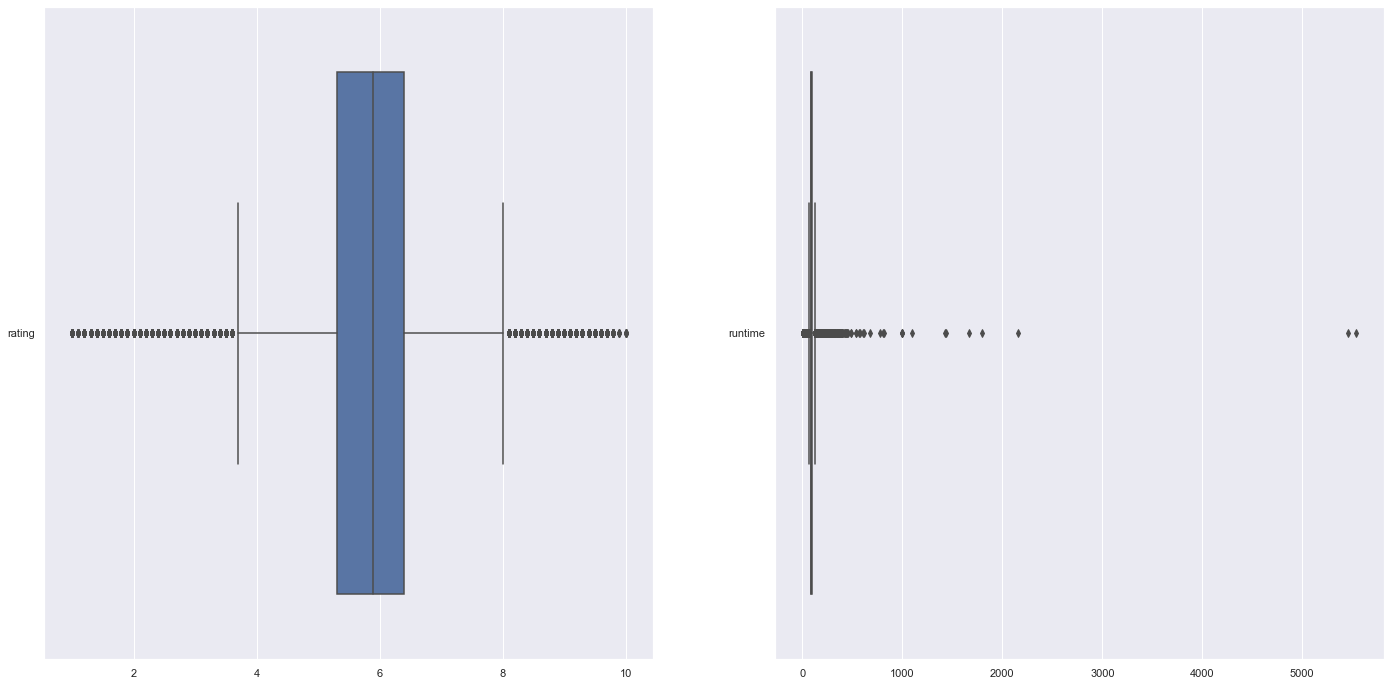

In [60]:
f, axes = plt.subplots(1,2,figsize=(24,12))
sb.boxplot(data = rating,ax=axes[0],orient="h")
sb.boxplot(data = runtime,ax=axes[1],orient="h")

In [61]:
q1 = runtime.quantile(0.25)
q3 = runtime.quantile(0.75)
IQR = q3-q1
count = 0
b = q1-(IQR*1.5)
c = q3+(IQR*1.5)

for x in range(0,1460):
        a= runtime['runtime'].values[x]
        if a<b['runtime']:
            count +=1
        elif a>c['runtime']:
            count +=1


In [63]:
print("The Number of outliers for runtime: " ,count)

The Number of outliers for runtime:  428


In [67]:
q1 = rating.quantile(0.25)
q3 = rating.quantile(0.75)
IQR = q3-q1
count2 = 0
b = q1-(IQR*1.5)
c = q3+(IQR*1.5)

for x in range(0,1460):
        a= rating['rating'].values[x]
        if a<b['rating']:
            count2 +=1
        elif a>c['rating']:
            count2 +=1

In [68]:
print("The Number of outliers for rating: " ,count2)

The Number of outliers for rating:  77


<AxesSubplot:ylabel='Density'>

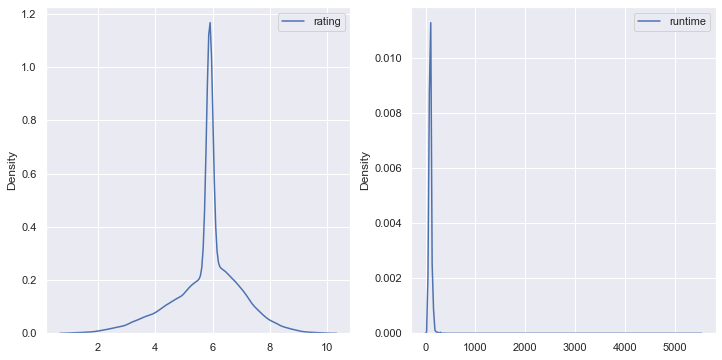

In [69]:
f, axes = plt.subplots(1,2,figsize=(12,6))
sb.kdeplot(data = rating,ax=axes[0])
sb.kdeplot(data = runtime,ax=axes[1])

In [70]:
jointplt = pd.concat([rating,runtime], axis = 1).reindex(runtime.index)

<AxesSubplot:>

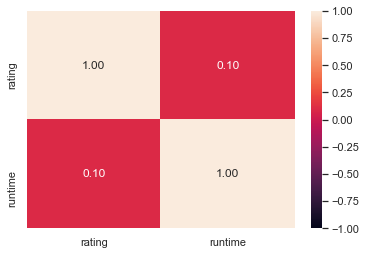

In [77]:
sb.heatmap(jointplt.corr(), vmin = -1, vmax = 1, annot = True , fmt = ".2f")

In [84]:
movie_clean['director'].unique

<bound method Series.unique of 0                                         [Ryan Coogler]
1                                        [James Cameron]
2                                 [Jean-François Richet]
3                           [Dan Kwan, Daniel Scheinert]
4                                      [Louis Leterrier]
                               ...                      
298963                                      [Lev Saakov]
298964                                  [Ilias Mahairas]
298965                                   [Okacha Touita]
298966                    [George Kelson, Harley Knoles]
298974    [Stein Vidar Aamodt, Ove Olsen, Jarle Solberg]
Name: director, Length: 133545, dtype: object>

In [85]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [89]:
to_1D(movie_clean["director"]).value_counts()

Godfrey Ho          147
Jesús Franco        125
Lew Landers          92
Cheh Chang           91
William Beaudine     89
                   ... 
Marios Ploritis       1
Anqi Liu              1
Eric Delgado          1
Carl Angelo Ruiz      1
Duane Brown           1
Length: 70756, dtype: int64

In [90]:
to_1D(movie_clean["star"]).value_counts()

Paquito Diaz          204
Eddie Garcia          201
Mithun Chakraborty    200
Fernando Poe Jr.      193
Brahmanandam          189
                     ... 
Ludwig Simon            1
Lucas Márquez           1
Gemma Mountain          1
Annabelle Hettmann      1
Martin Aguilar          1
Length: 238095, dtype: int64

In [136]:
to_1D(movie_clean["genre"]).value_counts().index.tolist()

['Drama',
 'Action',
 'Crime',
 'Thriller',
 'Comedy',
 'Horror',
 'Adventure',
 'Family',
 'Mystery',
 'Fantasy',
 'Romance',
 'Sci-Fi',
 'War',
 'History',
 'Animation',
 'Sport',
 'Biography',
 'Musical',
 'Music',
 'Western',
 'Film-Noir',
 'Reality-TV',
 'News',
 'Game-Show',
 'Talk-Show',
 'Short',
 'Adult']

<BarContainer object of 27 artists>

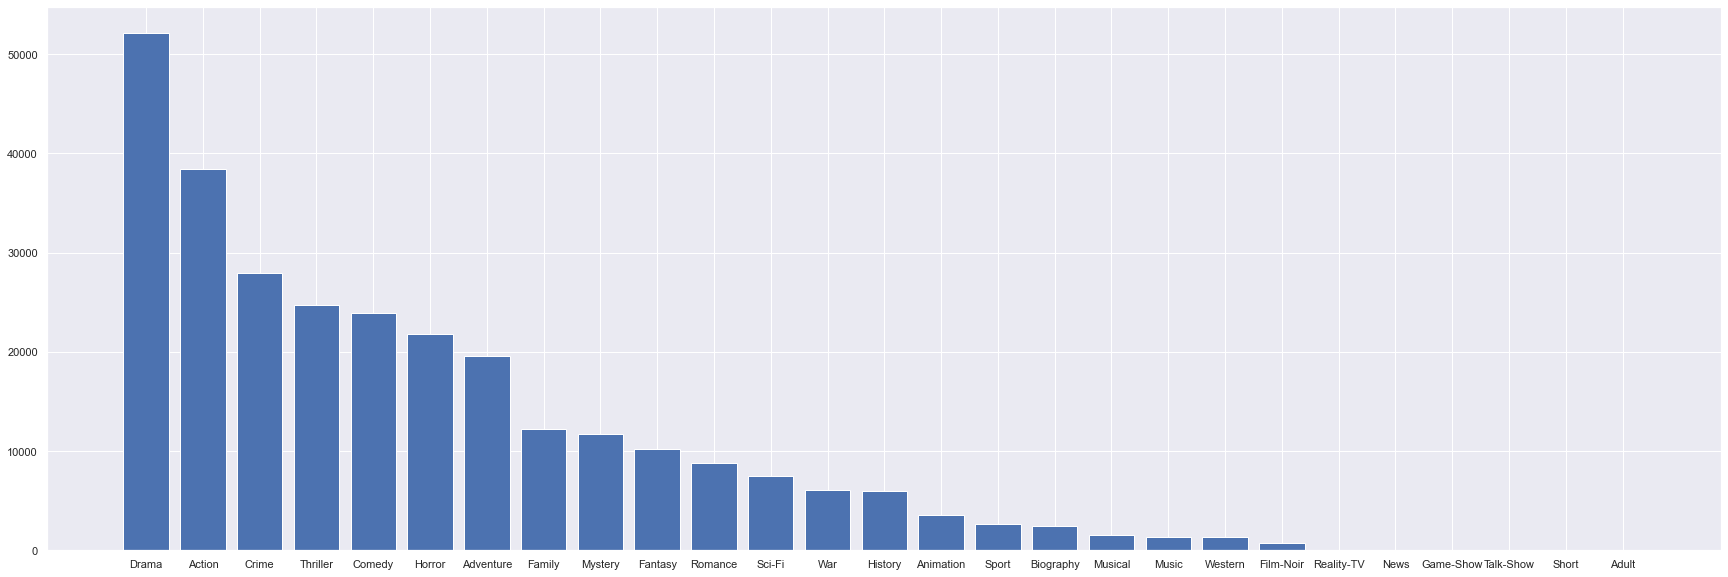

In [145]:
fig, ax = plt.subplots(figsize = (30,10))
ax.bar(to_1D(movie_clean["genre"]).value_counts().index.tolist() , to_1D(movie_clean["genre"]).value_counts().values )

In [148]:
GenreData = pd.DataFrame(to_1D(movie_clean["genre"]).value_counts())

In [151]:
GenreData

,0
Drama,52174
Action,38429
Crime,27910
Thriller,24760
Comedy,23944
Horror,21811
Adventure,19578
Family,12181
Mystery,11751
Fantasy,10190
